# Monday

Workflow:  using Jupyter notebooks as notes, along with a python class where functions will be written.

In [1]:
# my python file
import src.analytics as tics
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.stats import kendalltau
tics

<module 'src.analytics' from '/Users/tbot/Dropbox/0_galvanize/0_TODAY/Analyzing-Network-Traffic_kdd99/src/analytics.py'>

1- create gh repo
	- get .gitignore

2- create Jupyter Notebook for data

3- create a python class and import it into jupyter

--- commit

4- pull down the data into the repo
    - modify gitignore to ignore the data
--- commit

### write function to use bash to create samples from the data set

-- commit

In [2]:
# On OSX requires brew install coreutils, using gshuf instead of shuf
sample_name = 'data/sample_random_subset.csv'

tics.create_random_samples('data/kddcup.data_10_percent', 1000, sample_name)

### Get some Initial metrics

In [3]:
# more imports
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### As the name list that accompanies the data set did not have all the field names, I cross referenced with a `sql` file at https://github.com/myui/hivemall/wiki/KDD-cup-1999-network-intrusion-dataset-%231 .  This matched the order displayed with the data set as well as with other tables out on the webs.

In [4]:
# Create list of column names
columns = ['duration',
           'protocol_type',
           'service',
           'flag',
           'src_bytes',
           'dst_bytes',
           'land',
           'wrong_fragment',
           'urgent',
           'hot',
           'num_failed_logins',
           'logged_in',
           'num_compromised',
           'root_shell',
           'su_attempted',
           'num_root',
           'num_file_creations',
           'num_shells',
           'num_access_files',
           'num_outbound_cmds',
           'is_host_login',
           'is_guest_login',
           'count',
           'srv_count',
           'serror_rate',
           'srv_serror_rate',
           'rerror_rate',
           'srv_rerror_rate',
           'same_srv_rate',
           'diff_srv_rate',
           'srv_diff_host_rate',
           'dst_host_count',
           'dst_host_srv_count',
           'dst_host_same_srv_rate',
           'dst_host_diff_srv_rate',
           'dst_host_same_src_port_rate',
           'dst_host_srv_diff_host_rate',
           'dst_host_serror_rate',
           'dst_host_srv_serror_rate',
           'dst_host_rerror_rate',
           'dst_host_srv_rerror_rate',
           'label']
df = pd.read_csv(sample_name, header=None)
df.columns = columns
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,icmp,ecr_i,SF,520,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
1,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
2,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
3,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
4,0,tcp,http,SF,243,7333,0,0,0,0,...,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal.


In [5]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,1000.000000,1000.000000,1000.00000,1000.0,1000.000000,1000.0,1000.000000,1000.0,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,25.540000,834.635000,417.53100,0.0,0.001000,0.0,0.063000,0.0,0.142000,0.004000,...,233.200000,186.997000,0.749980,0.025470,0.591050,0.006920,0.182380,0.182930,0.065670,0.066010
std,368.149487,3476.382409,2014.54903,0.0,0.031623,0.0,1.220869,0.0,0.349225,0.063151,...,64.286599,106.797513,0.413005,0.086673,0.484117,0.045104,0.385574,0.386535,0.246167,0.246865
min,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,6.000000,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,255.000000,24.000000,0.265000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,520.000000,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1032.000000,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.050000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8573.000000,54540.000000,40376.00000,0.0,1.000000,0.0,30.000000,0.0,1.000000,1.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 42 columns):
duration                       1000 non-null int64
protocol_type                  1000 non-null object
service                        1000 non-null object
flag                           1000 non-null object
src_bytes                      1000 non-null int64
dst_bytes                      1000 non-null int64
land                           1000 non-null int64
wrong_fragment                 1000 non-null int64
urgent                         1000 non-null int64
hot                            1000 non-null int64
num_failed_logins              1000 non-null int64
logged_in                      1000 non-null int64
num_compromised                1000 non-null int64
root_shell                     1000 non-null int64
su_attempted                   1000 non-null int64
num_root                       1000 non-null int64
num_file_creations             1000 non-null int64
num_shells              

##### Count uniques for each object type

In [43]:
df['protocol_type'].unique()

array(['icmp', 'tcp', 'udp'], dtype=object)

##### Count number of zero values in each column

In [7]:
df['dst_bytes'][df['dst_bytes'] == 0].count() / len(df)

0.832

### Some Histograms

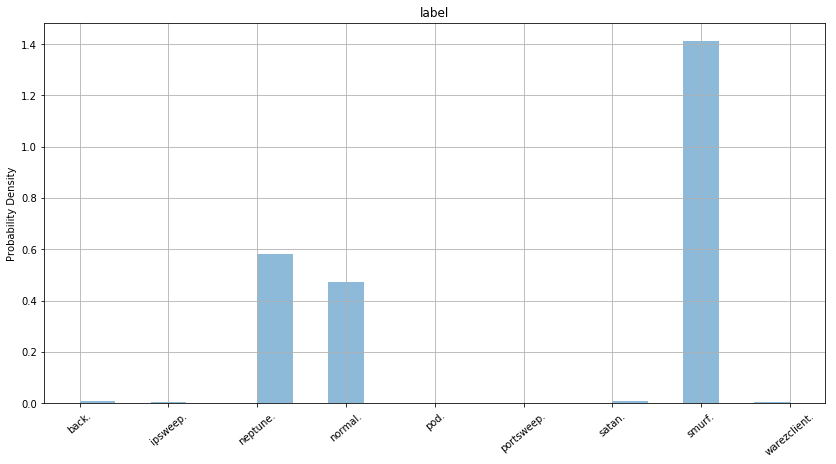

In [8]:
tics.plot_hist_basic(df, 'label')

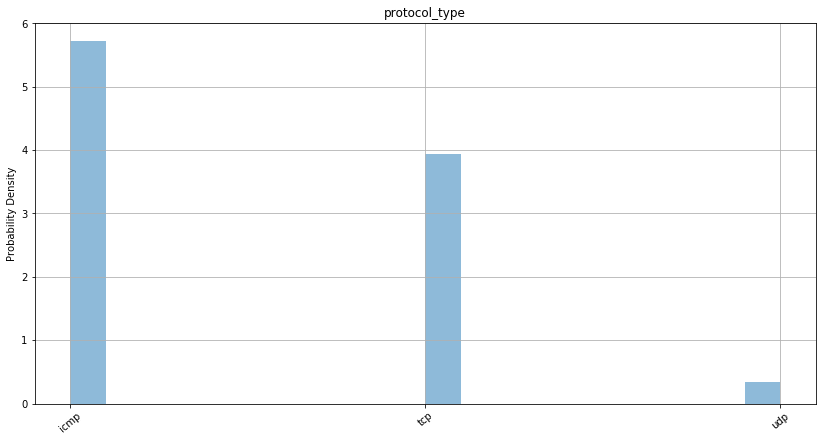

In [9]:
tics.plot_hist_basic(df, 'protocol_type')

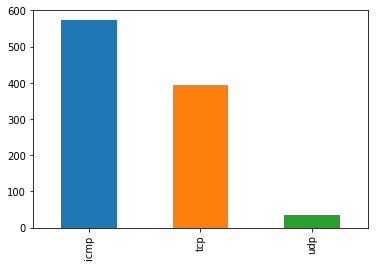

In [10]:
df['protocol_type'].value_counts().plot(kind='bar')

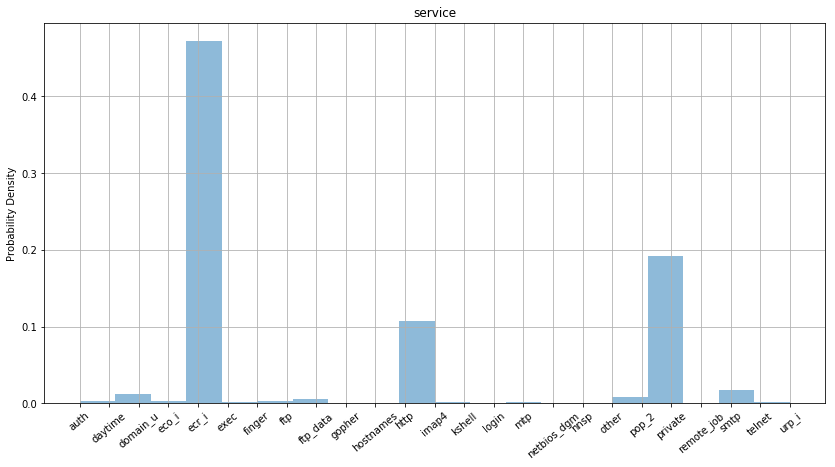

In [11]:
tics.plot_hist_basic(df, 'service')

In [12]:
# plot num_compromised against label?

# x_axis = df.label
# y_axis = df['num_compromised'].values

# plt.figure()
# plt.plot(x_axis, y_axis, 'r')
# plt.xlabel('Label')
# plt.ylabel('num_compromised')
# plt.title('Count of compromised per Label')
# plt.xticks(rotation=40)

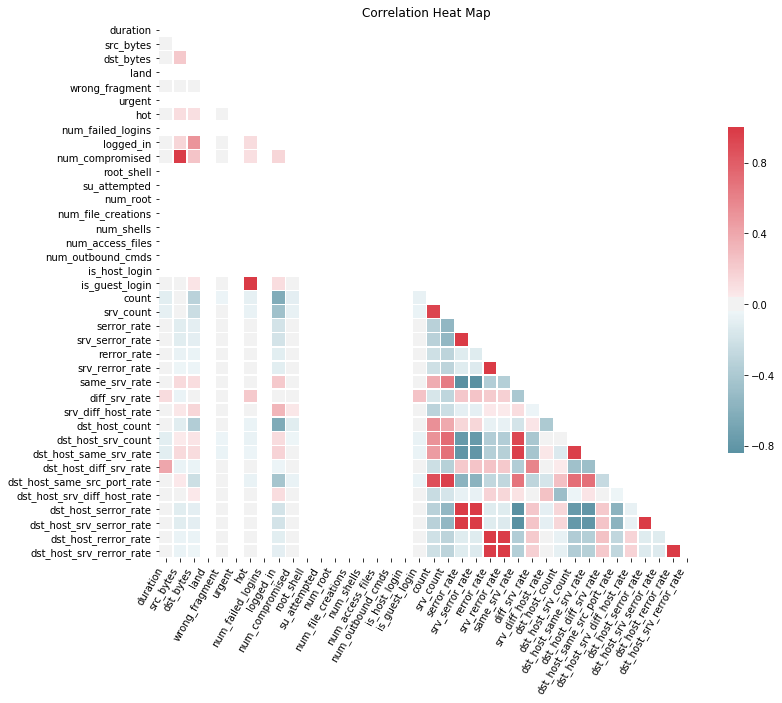

In [13]:
tics.corr_heat(df)

In [14]:
# unique values
df.label.unique()


array(['smurf.', 'normal.', 'neptune.', 'satan.', 'pod.', 'warezclient.',
       'back.', 'ipsweep.', 'portsweep.'], dtype=object)

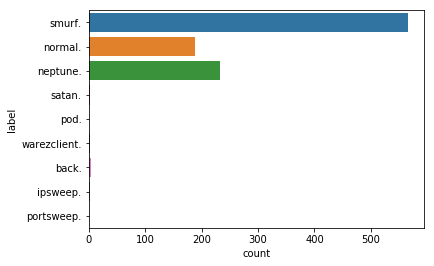

In [15]:
sns_plt = sns.countplot(y=df["label"])


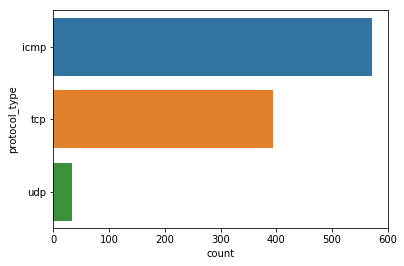

In [16]:
sns_plt = sns.countplot(y=df["protocol_type"])

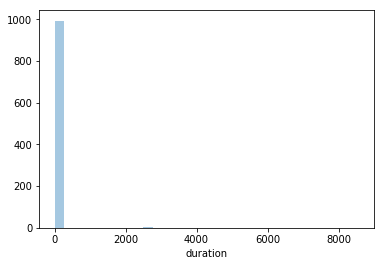

In [17]:
sns_plt = sns.distplot(df["duration"], kde=False)


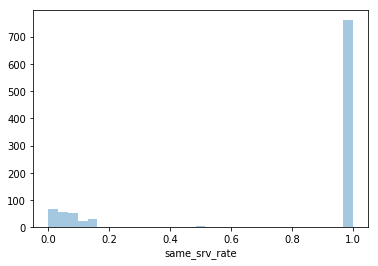

In [18]:
sns_plt = sns.distplot(df["same_srv_rate"], kde=False)


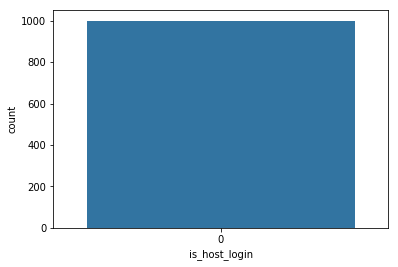

In [19]:
sns_plt = sns.countplot(x=df["is_host_login"])


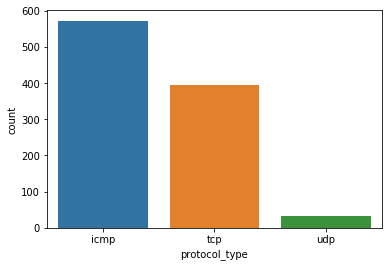

In [20]:
sns_plt = sns.countplot(df["protocol_type"])


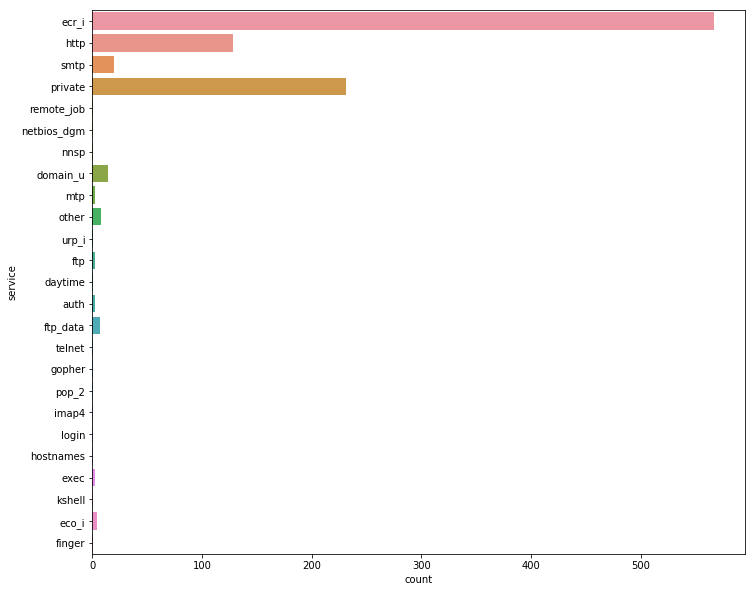

In [21]:
a4_dims = (11.7, 10)
fig, ax = plt.subplots(figsize=a4_dims)

sns_plt = sns.countplot(ax=ax,
                        y=df["service"])

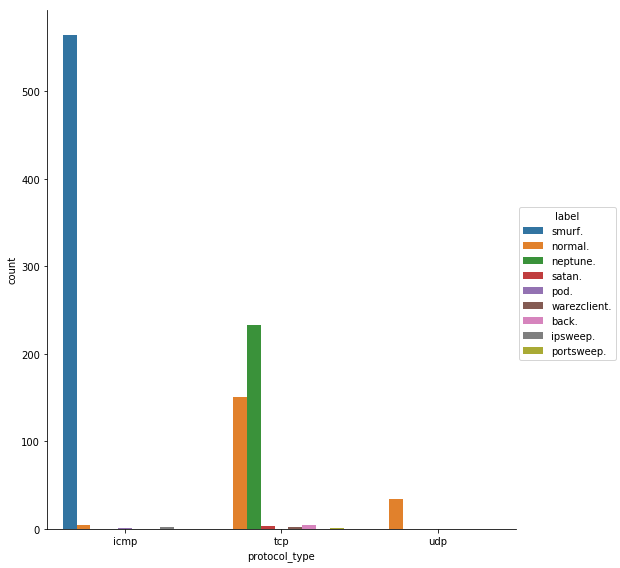

In [22]:
sns_plt = sns.factorplot(x='protocol_type', 
                         hue='label',
                         data=df,
                         kind='count',
                         size=8,

                         aspect=.9)

Note the large amount of Smurf attacks over ICMP protocol:

Smurf is a DDOS attack where large numbers of ICMP packets are broadcast to a computer network using the IP's broadcast address.  In the late 1990s, many IP networks would participate in Smurf attacks by responding to ICMP requests. The name comes from the idea of very small, but numerous, attackers overwhelming a much larger opponent 

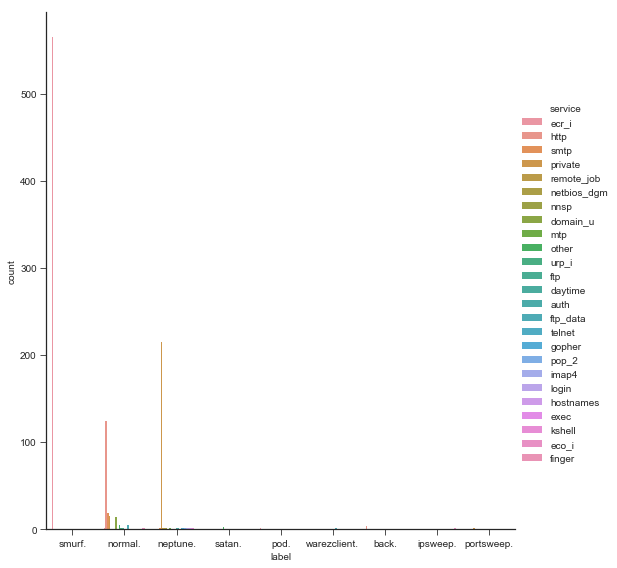

In [42]:
sns_plt = sns.factorplot(x='label', 
                         hue='service',
                         data=df,
                         kind='count',
                         size=8,

                         aspect=.9)